In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jinchen1036/Product-Price-Prediction/main/data/sample_data.csv")

In [3]:
df.shape

(1000, 8)

In [4]:
df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           1000 non-null   int64  
 1   name               1000 non-null   object 
 2   item_condition_id  1000 non-null   int64  
 3   category_name      996 non-null    object 
 4   brand_name         561 non-null    object 
 5   price              1000 non-null   float64
 6   shipping           1000 non-null   int64  
 7   item_description   1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


In [6]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,748447,Polaroid Camera,3,Electronics/Cameras & Photography/Film Photogr...,NaN,27.0,1,Film not included
1,674932,Vintage Ashtray,3,Vintage & Collectibles/Housewares/Coaster,NaN,8.0,0,Sip n Smoke ashtray. Would make a cute gift!
2,586672,Matilda Jane weekender nwt,1,Women/Women's Handbags/Other,NaN,52.0,0,NWT. Matilda Jane Clothing weekender bag. Over...
3,846012,Red Full Lace Wig,3,Women/Women's Accessories/Hair Accessories,NaN,69.0,0,12 inches
4,1026408,EQUATE NICOTINE TRANSDERMAL SYSTEM,1,Other/Daily & Travel items/Personal Care,NaN,19.0,0,13 patches left. Too strong for my husband.


## Visualizing the distribution of missing data

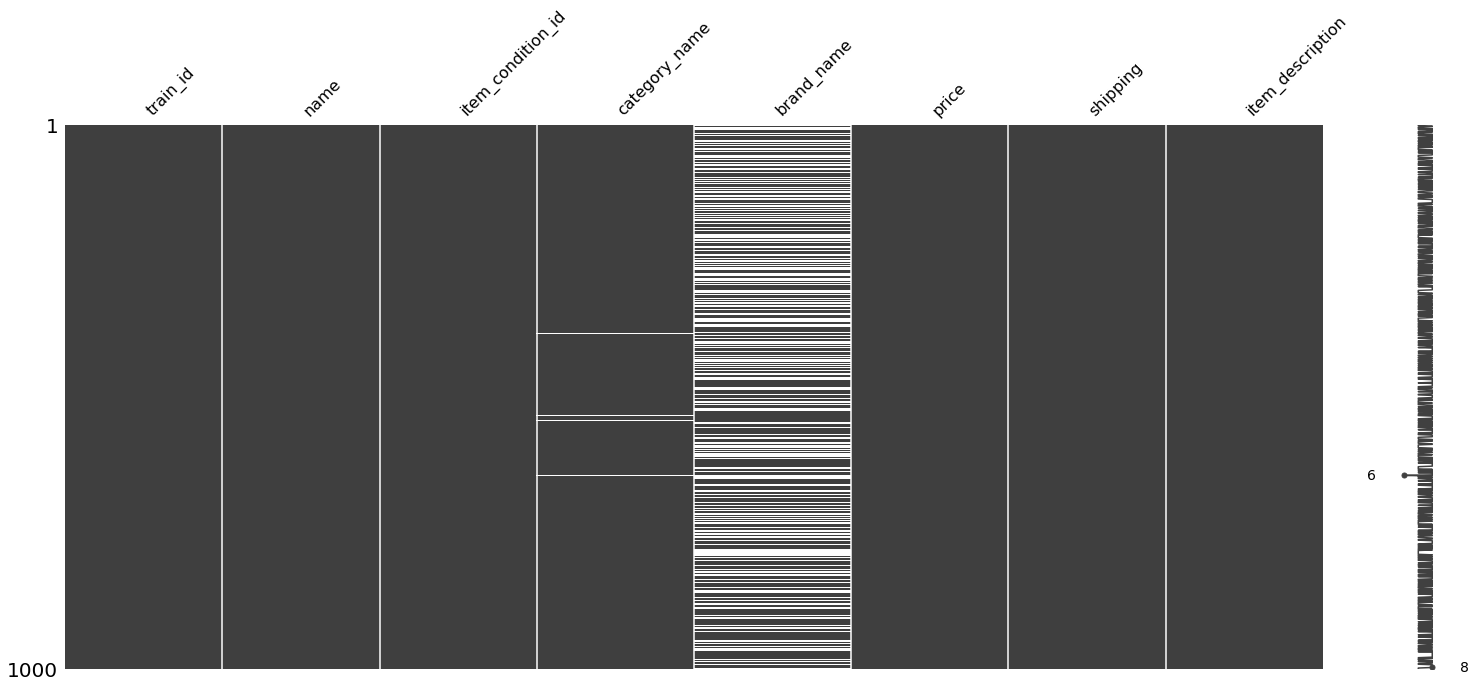

In [7]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(1000))

In [25]:
# sort df and see which category has the most missing data
df.sort_values(by=["category_name","brand_name"],inplace=True)
df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
662,115909,B&B Works Tutti Dolci Honey Praline FS,1,Beauty/Bath & Body/Bath,Bath & Body Works,9.0,1,"Brand new, 8 oz. Bath & Body Works Tutti Dolci..."
850,1404771,BBW Sweet Berries & Cream Hand Soaps,1,Beauty/Bath & Body/Bath,Bath & Body Works,16.0,0,Brand new never used Bath & Body Works Sweet B...
960,837627,Bath and Body Works Body Cream- Set of 3,1,Beauty/Bath & Body/Bath,Bath & Body Works,20.0,1,Three full size body creams! Sweet Magnolia an...
447,584300,Ahhh sugar sugar je'taime meringue,2,Beauty/Bath & Body/Bath,NaN,20.0,0,Ahhh sugar sugar Je'taime meringue New never u...
703,179240,VS pink robe,1,Beauty/Bath & Body/Bathing Accessories,Victoria's Secret,20.0,1,Size XS/S
...,...,...,...,...,...,...,...,...
963,1105250,thirty-one Tote,2,Women/Women's Handbags/Totes & Shoppers,NaN,25.0,0,Grey twill polka dot tote. It's roomy enough f...
783,642294,Obey Long-Sleeve Tee,2,NaN,Obey,14.0,0,"New Obey shirt, made in India. Never worn and ..."
32,709494,Vans Purple And Blue Ombre Shoes,2,NaN,VANS,26.0,0,"Worn once. Men's size 9, women's size 10"
571,1377532,Victoria Secret,2,NaN,Victoria's Secret,15.0,1,Girl's Night Flirty peony and waterlily Unused...


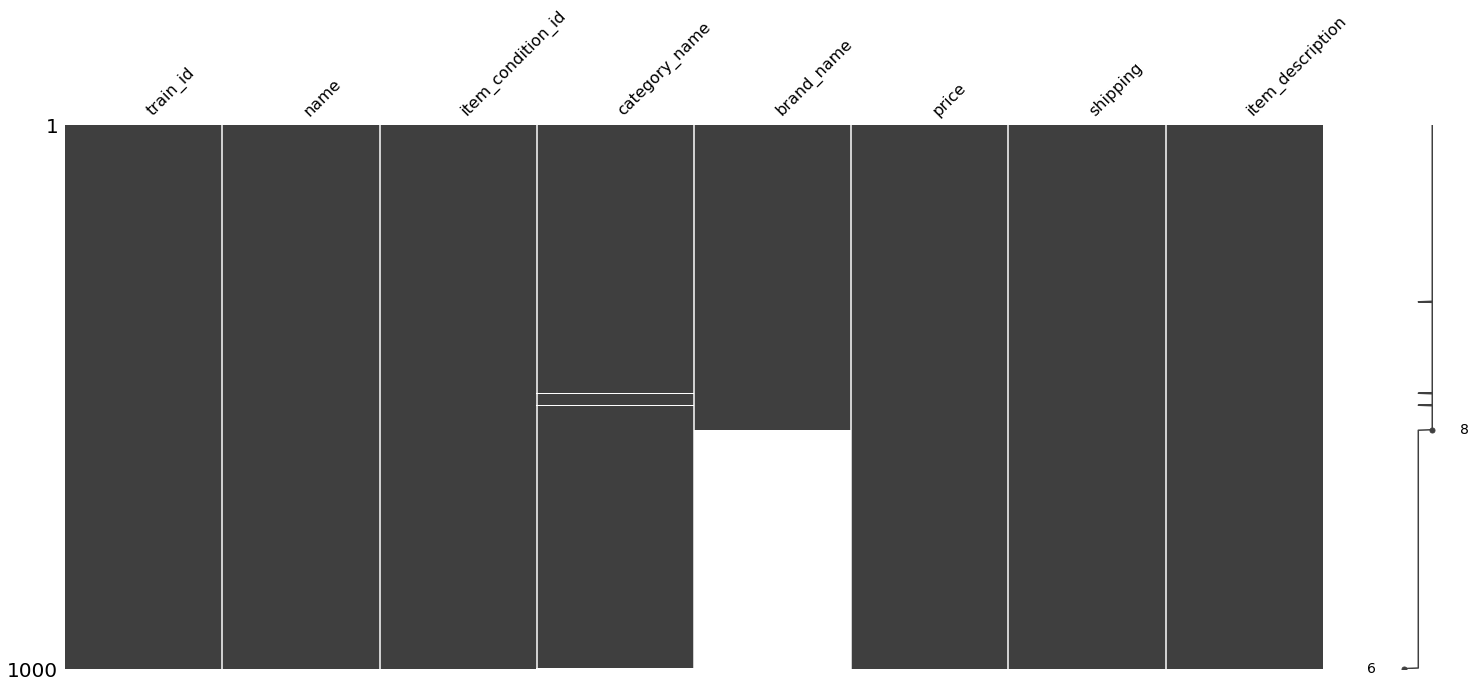

In [44]:
# isolate missing and complete data aside
missing_brand = df[df['brand_name'].isna()]
complete_brand = df[~df['brand_name'].isna()]
sorted_cate_df = df.sort_values(by="brand_name")
msno.matrix(sorted_cate_df)

In [49]:
df[df['brand_name'].isna()].info()
# only one category_name is missing under the condition of brand_name missing. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 447 to 549
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           439 non-null    int64  
 1   name               439 non-null    object 
 2   item_condition_id  439 non-null    int64  
 3   category_name      438 non-null    object 
 4   brand_name         0 non-null      object 
 5   price              439 non-null    float64
 6   shipping           439 non-null    int64  
 7   item_description   439 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 30.9+ KB
